In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [11]:
dataset.shape

(10, 3)

In [12]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


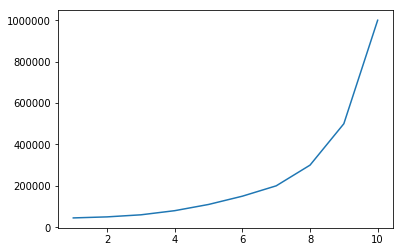

In [14]:
plt.plot(dataset['Level'], dataset['Salary'])
plt.show()

In [42]:
#Matrix of independent features
X = dataset.iloc[:,1:2].values

# Dependent Variable
y = dataset.iloc[:, 2].values

In [43]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [44]:
#Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)  
X_poly = poly_reg.fit_transform(X)

In [52]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [53]:
#Fitting Linear Regression to X_poly 
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

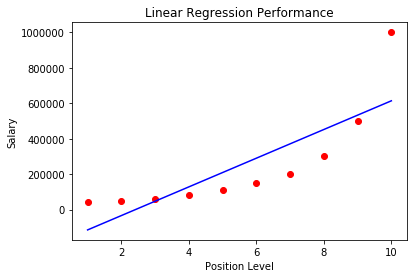

In [54]:
#Visualizing Linear Regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression Performance')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

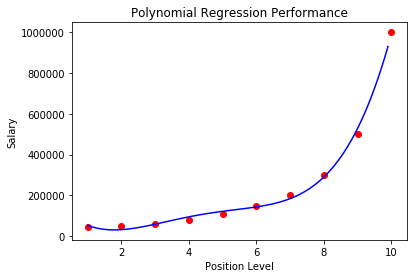

In [56]:
#Visualizing Polynomial Regression results

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression Performance')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [57]:
# Predict new result with Linear Regression

lin_reg.predict(6.5)

array([330378.78787879])

In [58]:
# Predict new result with Polynomial Regression, put 6.5 as salary level

lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])